In [68]:
from junifer.storage import HDF5FeatureStorage
from julearn.api import run_cross_validation
from julearn.pipeline import PipelineCreator
from julearn.viz import plot_scores
from julearn.stats.corrected_ttest import corrected_ttest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

In [51]:
with pd.HDFStore('/home/hsreekri/Julearn_predictions/data/IXI_HistogramGMVdata.h5', mode='r') as store:
    df_hists = store['histograms'] 
    df_bins = store['bins']
    
df_hists.index.name = 'subject'
df_hists = df_hists.reset_index()


In [52]:
df_demographics = pd.read_csv('/home/hsreekri/Julearn_predictions/data/IXI_demograpic_data.csv',sep=',')
df_demographics.rename(columns={"IXI_ID": "subject"}, inplace=True)
df_demographics['subject'] = df_demographics['subject'].apply(lambda x: f'sub-IXI{x}')

In [53]:
df_hists.columns = df_hists.columns.astype(str)
X_hists = list(df_hists.columns)
X_hists = X_hists[1:100]
df_full_histograms = df_hists.merge(df_demographics, on="subject")


In [54]:
df_full_histograms = df_full_histograms.dropna()

In [55]:
creator = PipelineCreator(problem_type="regression")
creator.add("zscore")
creator.add(
    "ridge"
)

In [57]:
search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["neg_mean_absolute_error","neg_mean_squared_error","neg_mean_absolute_percentage_error"]
scores_hists, model_hists, inspector_hists_ridge = run_cross_validation(
    X=X_hists,
    y='AGE',
    data=df_full_histograms,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10', 'Bin_11', 'Bin_12', 'Bin_13', 'Bin_14', 'Bin_15', 'Bin_16', 'Bin_17', 'Bin_18', 'Bin_19', 'Bin_20', 'Bin_21', 'Bin_22', 'Bin_23', 'Bin_24', 'Bin_25', 'Bin_26', 'Bin_27', 'Bin_28', 'Bin_29', 'Bin_30', 'Bin_31', 'Bin_32', 'Bin_33', 'Bin_34', 'Bin_35', 'Bin_36', 'Bin_37', 'Bin_38', 'Bin_39', 'Bin_40', 'Bin_41', 'Bin_42', 'Bin_43', 'Bin_44', 'Bin_45', 'Bin_46', 'Bin_47', 'Bin_48', 'Bin_49', 'Bin_50', 'Bin_51', 'Bin_52', 'Bin_53', 'Bin_54', 'Bin_55', 'Bin_56', 'Bin_57', 'Bin_58', 'Bin_59', 'Bin_60', 'Bin_61', 'Bin_62', 'Bin_63', 'Bin_64', 'Bin_65', 'Bin_66', 'Bin_67', 'Bin_68', 'Bin_69', 'Bin_70', 'Bin_71', 'Bin_72', 'Bin_73', 'Bin_74', 'Bin_75', 'Bin_76', 'Bin_77', 'Bin_78', 'Bin_79', 'Bin_80', 'Bin_81', 'Bin_82', 'Bin_83', 'Bin_84', 'Bin_85', 'Bin_86', 'Bin_

In [58]:
scores_hists

,fit_time,score_time,estimator,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,n_train,n_test,repeat,fold,cv_mdsum
0,0.006398,0.183110,"(SetColumnTypes(X_types={}), StandardScaler(),...",-11.712028,-9.178422,-202.528055,-124.871996,-0.256157,-0.216322,378,127,0,0,bc7087515161a73a5a6aff57863f3803
1,0.195252,0.002878,"(SetColumnTypes(X_types={}), StandardScaler(),...",-12.807570,-8.847273,-241.505946,-117.902252,-0.256048,-0.207856,379,126,0,1,bc7087515161a73a5a6aff57863f3803
2,0.098555,0.100878,"(SetColumnTypes(X_types={}), StandardScaler(),...",-12.143370,-8.992120,-262.670365,-119.086166,-0.285017,-0.201946,379,126,0,2,bc7087515161a73a5a6aff57863f3803
3,0.194462,0.003129,"(SetColumnTypes(X_types={}), StandardScaler(),...",-12.057265,-8.913394,-219.210869,-122.864710,-0.303592,-0.202126,379,126,0,3,bc7087515161a73a5a6aff57863f3803


In [59]:
print('MAE for Histograms (KRR)', abs(scores_hists["test_neg_mean_absolute_error"].mean()))
print(abs(scores_hists["test_neg_mean_absolute_percentage_error"].mean()))

MAE for Histograms (KRR) 12.18005822630761
0.27520348427719565


In [60]:
plot_scores(scores_hists)

BokehModel(combine_events=True, render_bundle={'docs_json': {'171f46bd-42bd-45a9-a268-dd7f22e22e29': {'version…

In [61]:
creator = PipelineCreator(problem_type="regression")
creator.add("zscore")
creator.add(
    "gauss"
)

search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["neg_mean_absolute_error","neg_mean_squared_error","neg_mean_absolute_percentage_error"]
scores_hists_gauss, model_hists, inspector_hists_gauss = run_cross_validation(
    X=X_hists,
    y='AGE',
    data=df_full_histograms,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10', 'Bin_11', 'Bin_12', 'Bin_13', 'Bin_14', 'Bin_15', 'Bin_16', 'Bin_17', 'Bin_18', 'Bin_19', 'Bin_20', 'Bin_21', 'Bin_22', 'Bin_23', 'Bin_24', 'Bin_25', 'Bin_26', 'Bin_27', 'Bin_28', 'Bin_29', 'Bin_30', 'Bin_31', 'Bin_32', 'Bin_33', 'Bin_34', 'Bin_35', 'Bin_36', 'Bin_37', 'Bin_38', 'Bin_39', 'Bin_40', 'Bin_41', 'Bin_42', 'Bin_43', 'Bin_44', 'Bin_45', 'Bin_46', 'Bin_47', 'Bin_48', 'Bin_49', 'Bin_50', 'Bin_51', 'Bin_52', 'Bin_53', 'Bin_54', 'Bin_55', 'Bin_56', 'Bin_57', 'Bin_58', 'Bin_59', 'Bin_60', 'Bin_61', 'Bin_62', 'Bin_63', 'Bin_64', 'Bin_65', 'Bin_66', 'Bin_67', 'Bin_68', 'Bin_69', 'Bin_70', 'Bin_71', 'Bin_72', 'Bin_73', 'Bin_74', 'Bin_75', 'Bin_76', 'Bin_77', 'Bin_78', 'Bin_79', 'Bin_80', 'Bin_81', 'Bin_82', 'Bin_83', 'Bin_84', 'Bin_85', 'Bin_86', 'Bin_

In [62]:
scores_hists_gauss

,fit_time,score_time,estimator,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,n_train,n_test,repeat,fold,cv_mdsum
0,0.758425,0.211246,"(SetColumnTypes(X_types={}), StandardScaler(),...",-54.210558,-0.013968,-3185.409419,-0.033048,-0.996933,-0.000250,378,127,0,0,bc7087515161a73a5a6aff57863f3803
1,0.699119,0.102079,"(SetColumnTypes(X_types={}), StandardScaler(),...",-55.198199,-0.000765,-3262.554891,-0.000111,-0.998884,-0.000012,379,126,0,1,bc7087515161a73a5a6aff57863f3803
2,0.898729,0.200568,"(SetColumnTypes(X_types={}), StandardScaler(),...",-47.776023,-0.013931,-2593.400810,-0.032961,-0.998567,-0.000250,379,126,0,2,bc7087515161a73a5a6aff57863f3803
3,0.699746,0.199742,"(SetColumnTypes(X_types={}), StandardScaler(),...",-49.100012,-0.013166,-2652.509175,-0.032850,-0.997756,-0.000237,379,126,0,3,bc7087515161a73a5a6aff57863f3803


In [63]:
print('MAE for Histograms (GP)', abs(scores_hists_gauss["test_neg_mean_absolute_error"].mean()))
print(abs(scores_hists_gauss["test_neg_mean_absolute_percentage_error"].mean()))

MAE for Histograms (GP) 51.571198200652944
0.9980348692518237


In [64]:
plot_scores(scores_hists,scores_hists_gauss)

BokehModel(combine_events=True, render_bundle={'docs_json': {'e8980e8c-b6f5-4ade-a2e8-6da9bb28fff1': {'version…

In [66]:
def return_preds(*inspectors):
    n = len(inspectors)
    fig, axes = plt.subplots(1, n, figsize=(10 * n, 7))
    sns.set_style("darkgrid")
    
    if n == 1:
        axes = [axes]  
    
    for i, inspector in enumerate(inspectors):
        fold_predictions = inspector.folds.predict()
        y_true = fold_predictions['target']
        y_pred = fold_predictions['repeat0_p0']

        mae = format(mean_absolute_error(y_true, y_pred), ".2f")
        corr = format(np.corrcoef(y_pred, y_true)[1, 0], ".2f")
        
        ax = axes[i]
        ax.scatter(y_true, y_pred)
        ax.plot(y_true, y_true, color='red')
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        text = "MAE: " + str(mae) + "   CORR: " + str(corr)
        ax.set(xlabel="True values", ylabel="Predicted values")
        ax.set_title(f"Actual vs Predicted ({i + 1})")
        ax.text(
            xmax - 0.01 * xmax,
            ymax - 0.01 * ymax,
            text,
            verticalalignment="top",
            horizontalalignment="right",
            fontsize=12,
        )
        #ax.axis("scaled")
    
    plt.tight_layout()
    plt.show()

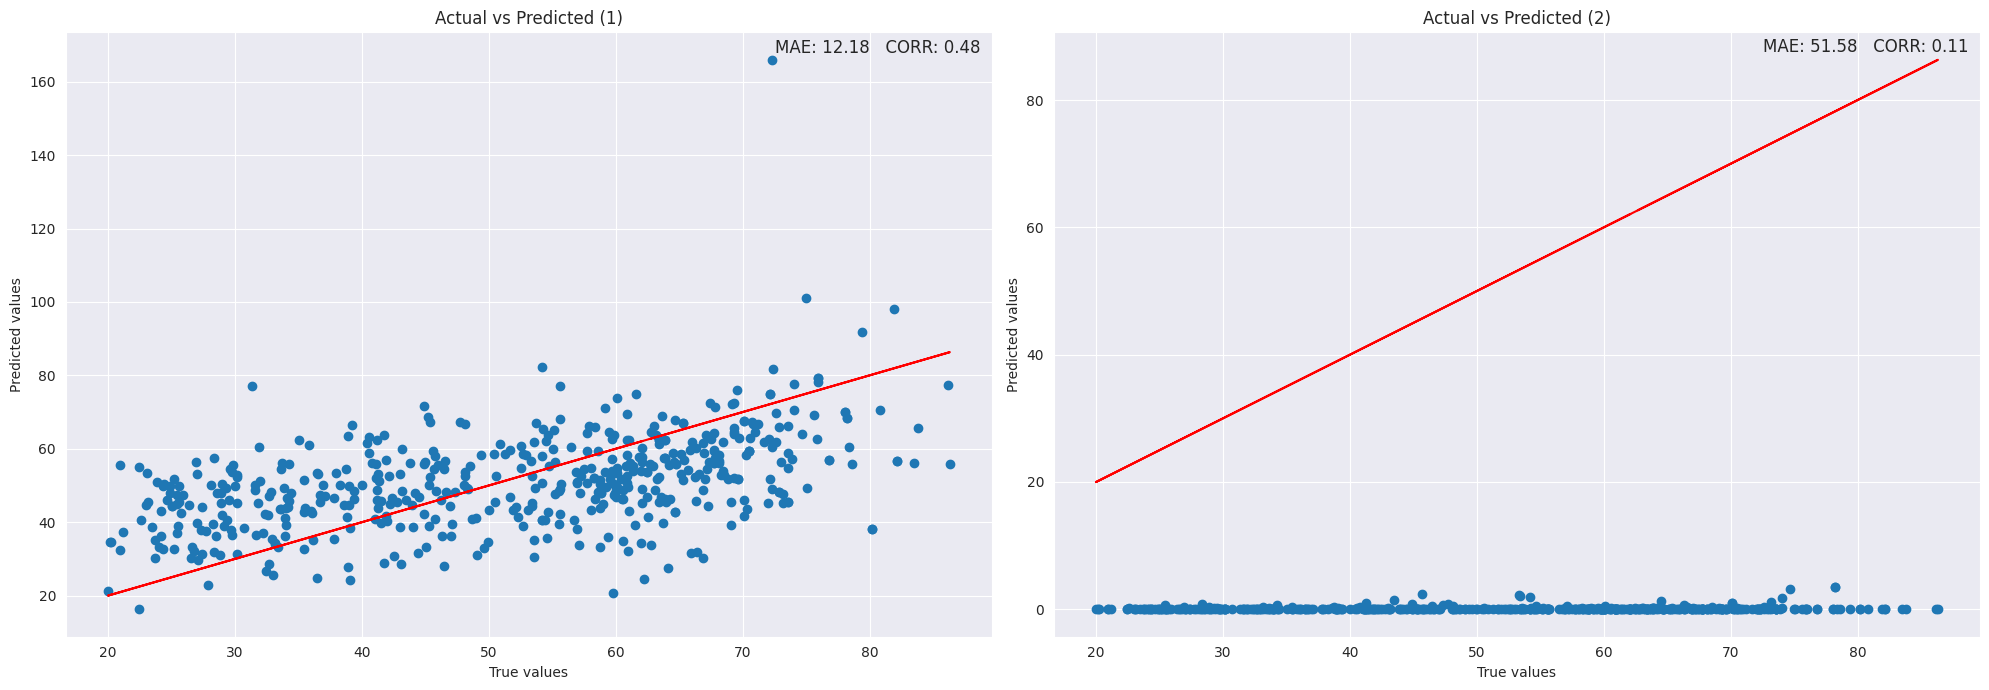

In [69]:
return_preds(inspector_hists_ridge,inspector_hists_gauss)